# Алгоритмы безусловной нелинейной оптимизации. Прямые методы

In [71]:
import random
import math as m
import matplotlib.pyplot as plt

## Part 1

1. $f(x)=x^3, \,x\in\left[0,1\right];$
2. $f(x)=|x-0.2|,\, x\in\left[0,1\right];$
3. $f(x) = x\cdot \sin\dfrac{1}{x},\, x\in\left[0.1,1\right].$


In [42]:
eps = 1e-3
x_left = 0
x_right = 1
x = [round(i * eps, 3) for i in range(round((x_right - x_left)/eps))]

In [32]:
def f1(x):
    return x ** 3

def f2(x):
    return abs(x - 0.2)

def f3(x):
    return x * math.sin(1/x)

In [33]:
y1 = [f1(i) for i in x]
y2 = [f2(i) for i in x]
y3 = [f3(i) for i in x[100:]]

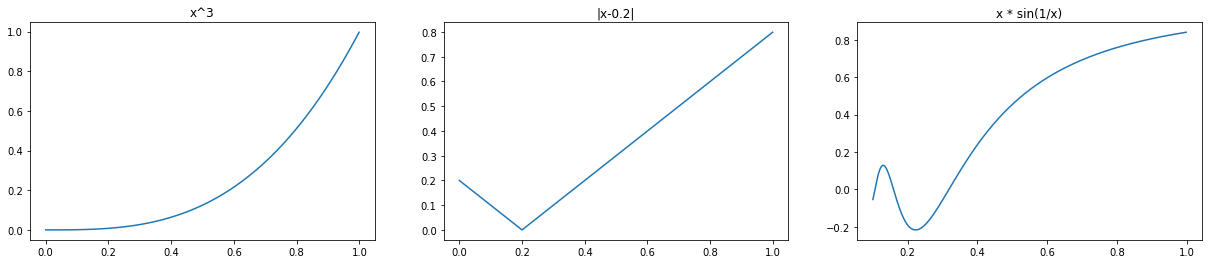

In [98]:
f = plt.figure(figsize=(21,4))
ax = f.add_subplot(131)
ax.set_title('x^3')
ax.plot(x, y1)

ax2 = f.add_subplot(132)
ax2.plot(x, y2)
ax2.set_title('|x-0.2|')

ax3 = f.add_subplot(133)
ax3.plot(x[100:], y3)
ax3.set_title('x * sin(1/x)')

plt.show()

## Одномерные методы перебора

### Метод дихотомии

In [95]:
def dichotomy(a, b, eps, func):
    # Метод дихотомии (деления отрезка пополам)
    right = b
    left = a
    delta = eps / 2
    counter = 0

    while right - left > eps:
        counter += 1
        x1 = (left + right) / 2 - delta
        x2 = (left + right) / 2 + delta
        f1 = func(x1)
        f2 = func(x2)
        if f1 > f2:
            left = x1 + delta
        if f1 < f2:
            right = x2 - delta
    # Количество итераций
    iter_dich = m.log((b - a) / eps, m.e) / m.log(2, m.e)
    res_dich = {}
    res_dich["x"] = round((left + right) / 2, 3)
    res_dich["iterations"] = round(iter_dich, 3)
    res_dich["counter"] = counter
    return res_dich


In [100]:
def visualise(method):
    f = plt.figure(figsize=(21,4))

    ax = f.add_subplot(131)
    ax.plot(x, y1)
    x1 = method(0, 1, 1e-3, f1)
    print(x1)
    ax.scatter(x=x1["x"], y=f1(x1["x"]), c='r') 
    ax.set_title('x^3')

    ax2 = f.add_subplot(132)
    ax2.plot(x, y2)
    x2 = method(0, 1, 1e-3, f2)
    print(x2)
    ax2.scatter(x=x2["x"], y=f2(x2["x"]), c='r') 
    ax2.set_title('|x-0.2|')

    ax3 = f.add_subplot(133)
    ax3.plot(x[100:], y3)
    x3 = method(0.1, 1, 1e-3, f3)
    print(x3)
    ax3.scatter(x=x3["x"], y=f3(x3["x"]), c='r') 
    ax3.set_title('x * sin(1/x)')

    plt.show()

{'x': 0.0, 'iterations': 9.966, 'counter': 10}
{'x': 0.2, 'iterations': 9.966, 'counter': 10}
{'x': 0.223, 'iterations': 9.814, 'counter': 10}


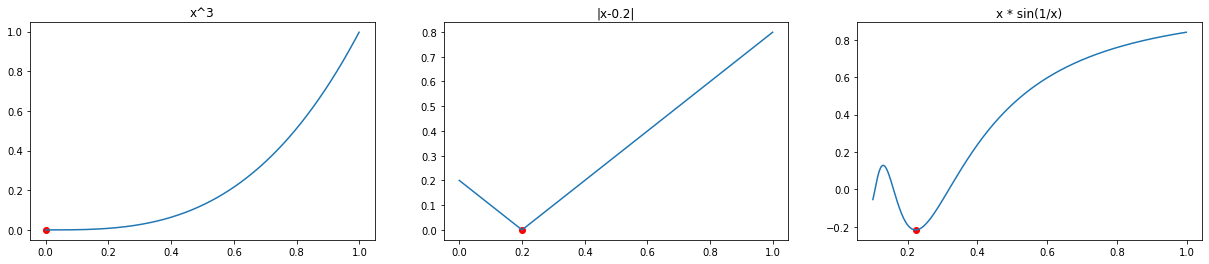

In [101]:
visualise(dichotomy)

### Метод золотого сечения

In [103]:
# Метод золотого сечения
def golden_ratio(a, b, eps, func):
    right = b
    left = a
    counter = 0
    iter_gold = m.log((b - a) / eps, m.e) / m.log(1.618, m.e)
    psi = (1 + m.sqrt(5)) / 2
    x1 = right - (right - left) / psi
    x2 = left + (right - left) / psi
    f2 = func(x2)
    f1 = func(x1)
    while right - left > eps:
        counter += 1
        if f1 > f2:
            left = x1
            x1 = x2
            x2 = left + (right - left) / psi
            f1 = f2
            f2 = func(x2)
        else:
            right = x2
            x2 = x1
            x1 = right - (right - left) / psi
            f2 = f1
            f1 = func(x1)
    gold_res = {}
    gold_res["x"] = round((left + right) / 2, 3)
    gold_res["iterations"] = round(iter_gold, 3)
    gold_res["counter"] = counter
    return gold_res

{'x': 0.0, 'iterations': 14.356, 'counter': 15}
{'x': 0.2, 'iterations': 14.356, 'counter': 15}
{'x': 0.223, 'iterations': 14.137, 'counter': 15}


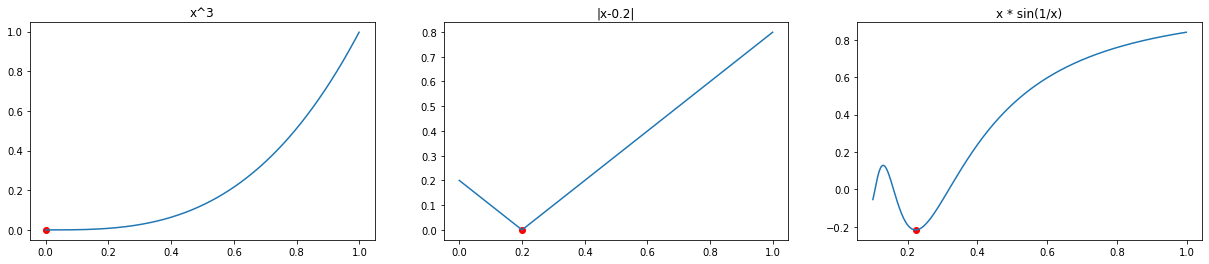

In [104]:
visualise(golden_ratio)

## Многомерные методы перебора

### Метод Гаусса

### Метод Нелдера-Мида